#watsapp chat analysis with python

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import  Image
import datetime
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
%matplotlib inline

In [ ]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'  #pattern for date and time
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
def find_author(s):
    s = s.split(":") #after author name : is there and then message starts so to get author we have to split it by :
    if len(s)==2: #date,time and then author so that the length should be 2
        return True
    else:
        return False

In [ ]:
def getDatapoint(line):
    splitline = line.split(" - ") #date,time - Author : message
    dateTime = splitline[0]   #so when we split by - we will get date time at 0 index
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:]) #message will be from ":"...........till message ends
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list

In [ ]:

data = []
conversation = '/content/WhatsApp Chat with Jaitejj.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)


In [ ]:
df = pd.DataFrame(data,columns=["Date",'Time','Author','Message'])
df['Date']=pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

            Date   Time  Author                    Message
39977 2023-12-03  23:33  Jaitej                    vellali
39978 2023-12-03  23:33  Jaitej                        bye
39979 2023-12-03  23:33      ..                       okay
39980 2023-12-03  23:33  Jaitej                         gn
39981 2023-12-03  23:33      ..                        bye
39982 2023-12-03  23:33      ..                         gn
39983 2023-12-03  23:34      ..                    untava?
39984 2023-12-03  23:34      ..            ledha sleep ah?
39985 2023-12-03  23:43  Jaitej  I will sleep in few mins.
39986 2023-12-03  23:43  Jaitej                10 mins ala
39987 2023-12-03  23:43      ..                      avuna
39988 2023-12-03  23:43      ..                       okay
39989 2023-12-03  23:43      ..                     msg me
39990 2023-12-03  23:44      ..   You deleted this message
39991 2023-12-03  23:44      ..   You deleted this message
39992 2023-12-03  23:44      ..   You deleted this messa

In [ ]:
total_messages=df.shape[0]
print(total_messages)

39997


In [ ]:

media_message=df[df["Message"]=='<Media omitted>'].shape[0]
print(media_message)

722


In [ ]:
import emoji
def split_count(text):
    emoji_list = []
    data = re.findall('(\u00a9|\u00ae|[\u2000-\u3300]|\ud83c[\ud000-\udfff]|\ud83d[\ud000-\udfff]|\ud83e[\ud000-\udfff])',text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

149


In [ ]:

media_messages=df[df['Message']=="<Media omitted>"].shape[0]
print(media_messages)

722


In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Me and Teju")
print("Total Messages: ", total_messages)
print("Media Messages",media_message)
print("Number of Emojis Shared", emoji)
print("Number of Links Shared", links)

Chats between Me and Teju
Total Messages:  39997
Media Messages 722
Number of Emojis Shared <module 'emoji' from '/usr/local/lib/python3.9/dist-packages/emoji/__init__.py'>
Number of Links Shared 333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39997 entries, 0 to 39996
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      39997 non-null  datetime64[ns]
 1   Time      39997 non-null  object        
 2   Author    39610 non-null  object        
 3   Message   39997 non-null  object        
 4   emoji     39997 non-null  object        
 5   urlcount  39997 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39610 entries, 0 to 39996
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      39610 non-null  datetime64[ns]
 1   Time      39610 non-null  object        
 2   Author    39610 non-null  object        
 3   Message   39610 non-null  object        
 4   emoji     39610 non-null  object        
 5   urlcount  39610 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
Messages_df = df.drop(media_messages_df.index)
Messages_df['Letter_Count'] = Messages_df['Message'].apply(lambda s : len(s))
Messages_df['Word_Count'] = Messages_df['Message'].apply(lambda s : len(s.split(' ')))
Messages_df["MessageCount"]=1

l = ["..", "Jaitejj"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= Messages_df[Messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])
  print('Links Sent', links)

Stats of .. -
Messages Sent 21524
Average Words per message 2.3120237874001117
Media Messages Sent 486
Emojis Sent 95
Links Sent 4
Stats of Jaitejj -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


<ipython-input-26-2a43a43ddeb8>:16: RuntimeWarning: invalid value encountered in long_scalars
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [ ]:
total_emojis_list = list(set([a for b in Messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in Messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


('❤', 98)
('♀', 16)
('☺', 11)
('♥', 7)
('♂', 6)
('✌', 5)
('☹', 2)
('☕', 2)
('☮', 2)


There are 566433 words in all the messages.


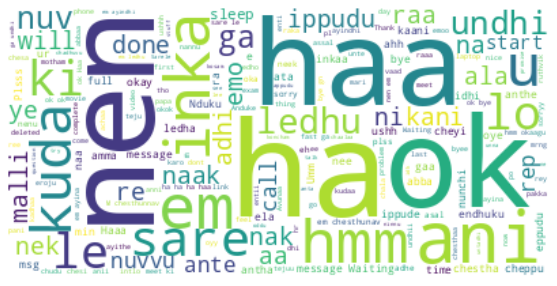

In [ ]:
text = " ".join(review for review in Messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Author name ..


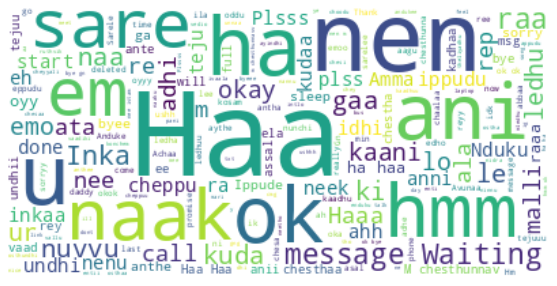

Author name Jaitej


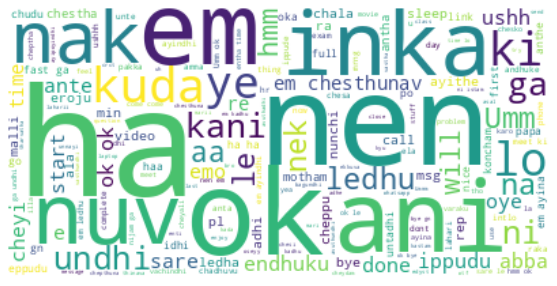

In [ ]:
l = ["..","Jaitej"]
for i in range(len(l)):
  dummy_df = Messages_df[Messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()